In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexisschottenstein/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = "07a5ef649aa445acaf5915db1b3ec3c4"#os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 4310


In [7]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 921


In [8]:
ethereum_headlines["articles"][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Miller Kern',
 'title': 'Debunking Blockchain once and for all',
 'description': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20. When it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top …",
 'url': 'https://mashable.com/shopping/oct-20-blockchain-and-ethereum-programmer-online-courses/',
 'urlToImage': 'https://mondrian.mashable.com/2019%252F10%252F20%252F20%252Fd451f6dc63634e7ebc1a6884f0de511f.0108b.jpg%252F1200x630.jpg?signature=wXr1QUIZY8rWVXkvW6qxTgQk24E=',
 'publishedAt': '2019-10-20T09:00:00Z',
 'content': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… 

In [9]:
#create a function called create_df(news, language) 
#that will transform the articles list in a DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

#Create a DataFrame For Bitcoin
bitcoin_df_art = create_df(bitcoin_headlines["articles"], "en")

# Create a DataFrame For Ethereum
ethereum_df_art = create_df(ethereum_headlines["articles"], "en")


In [10]:
bitcoin_df_art.head()

,title,description,text,date,language
0,Inside the Icelandic Facility Where Bitcoin Is...,Cryptocurrency mining now uses more of the Nor...,Less than two miles from Icelands Reykjavik ai...,2019-11-03,en
1,HTC's Exodus 1s can run a full Bitcoin node fo...,After first teasing the device earlier this ye...,At least that's the idea. While it's not as in...,2019-10-19,en
2,French Students Will Now Have to Learn About B...,High school students in France may be among th...,High school students in France may be among th...,2019-11-01,en
3,Debunking Blockchain once and for all,TL;DR: The in-depth Complete Blockchain and Et...,TL;DR: The in-depth Complete Blockchain and Et...,2019-10-20,en
4,Satoshi Nakaboto: ‘Chinese congress passes ‘cr...,Our robot colleague Satoshi Nakaboto writes ab...,Our robot colleague Satoshi Nakaboto writes ab...,2019-10-27,en


In [11]:
# Create the Bitcoin sentiment scores DataFrame


for article in bitcoin_headlines["articles"]:
    Bitcoin_sentiments = []
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu          
        })
        
    except AttributeError:
        pass
    




In [12]:
def generate_sentiments(articles):
    sentiments=[]
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu
            })
        except AttributeError:
            pass
    return sentiments

In [13]:
# Create DataFrame
bitcoin_sentiments = pd.DataFrame(generate_sentiments(bitcoin_headlines["articles"]))
# Reorder DataFrame columns
cols = ['Compound','Negative','Neutral','Positive','Text']
bitcoin_sentiments = bitcoin_sentiments[cols]

bitcoin_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [14]:
# Create the ethereum sentiment scores DataFrame
etheruem_sentiments = pd.DataFrame(generate_sentiments(ethereum_headlines["articles"]))

# Reorder DataFrame columns
cols = ['Compound','Negative','Neutral','Positive','Text']
etheruem_sentiments = etheruem_sentiments[cols]

etheruem_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.144200,0.039398,0.900061,0.060561
std,0.437824,0.054791,0.075762,0.053277
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.096325,0.000000,0.857750,0.000000
50%,0.175200,0.000000,0.927000,0.065500
75%,0.507000,0.067500,0.946500,0.085250
max,0.914100,0.271000,1.000000,0.249000


In [16]:
# Describe the Ethereum Sentiment
etheruem_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.178518,0.026906,0.916385,0.056698
std,0.410332,0.048792,0.072458,0.055863
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.889500,0.000000
50%,0.250000,0.000000,0.930000,0.057000
75%,0.502100,0.045250,0.958000,0.098500
max,0.822100,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had a slightly higher mean positive score, but it was so miniscule I would consider it insignificant (0.059567-0.056698)/0.59567*100 = .76 %. It is not even a full percent difference

Q: Which coin had the highest compound score?

A: Bitcoin had a higher compound score(0.914100) compared to Etheruem which had a lower score(0.822100)

Q. Which coin had the highest positive score?

A: Bitcoin had a highest postitive score of .249 comapred to Ethereum's highest postive score of .239

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisschottenstein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Expand the default stopwords list if necessary

In [19]:
# Instantiate the lemmatizer

# Complete the tokenizer function,Create a list of the words
#Convert the words to lowercase,Remove the punctuation,Remove the stop words
# Lemmatize Words into root words
def tokenizer(text):
    """Tokenizes text."""
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_addon = {'(',')',',','.','[',']',':',':'}
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return output
    

In [20]:
bitcoin_sentiments['Tokens']=[tokenizer(r) for r in bitcoin_sentiments['Text']]
bitcoin_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
...,...,...,...,...,...,...
93,0.0000,0.000,1.000,0.000,Bitcoin prices have quietly been in meltdown m...,"[bitcoin, price, quietly, meltdown, mode, rece..."
94,0.1531,0.037,0.911,0.051,Illustration by Stephen Shankland/CNET\r\nAfte...,"[illustration, stephen, shanklandcnetafter, fo..."
95,0.2023,0.047,0.887,0.067,After seeing its IPO dreams slashed earlier th...,"[seeing, ipo, dream, slashed, earlier, year, b..."
96,-0.7140,0.184,0.736,0.080,"I hate to be the bearer of bad news, but victi...","[hate, bearer, bad, news, victim, lost, money,..."


In [21]:
bitcoin_sentiments.keys()

Index(['Compound', 'Negative', 'Neutral', 'Positive', 'Text', 'Tokens'], dtype='object')

In [22]:
etheruem_sentiments['Tokens']=[tokenizer(r) for r in etheruem_sentiments['Text']]
etheruem_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti..."
...,...,...,...,...,...,...
91,-0.5423,0.106,0.894,0.000,A Spanish financial watchdog has issued a warn...,"[spanish, financial, watchdog, ha, issued, war..."
92,0.3818,0.000,0.936,0.064,Noelle Acheson is a veteran of company analysi...,"[noelle, acheson, veteran, company, analysis, ..."
93,0.0000,0.000,1.000,0.000,"Bitski, a developer-focused blockchain wallet ...","[bitski, developerfocused, blockchain, wallet,..."
94,0.8221,0.000,0.798,0.202,"Ethereum co-founder and founder of Consensys, ...","[ethereum, cofounder, founder, consensys, jose..."


In [23]:
etheruem_sentiments.keys()

Index(['Compound', 'Negative', 'Neutral', 'Positive', 'Text', 'Tokens'], dtype='object')

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk.util import ngrams
import nltk, re, string, collections

In [25]:
#Loopthrough tokens and use counter to get top 10 most common words in btc
all_btc_tokens = []
for x in range(0,len(bitcoin_sentiments)):
    for y in bitcoin_sentiments['Tokens'][x]:
        all_btc_tokens.append(y)
# Generate the BTC N-grams where N=2
bigram_btc_counts = Counter(ngrams(all_btc_tokens, n=2))
bigram_btc_counts.most_common(10)

[(('satoshi', 'nakaboto'), 38),
 (('bitcoin', 'btc'), 25),
 (('char', 'robot'), 19),
 (('robot', 'colleague'), 19),
 (('colleague', 'satoshi'), 19),
 (('nakaboto', 'writes'), 19),
 (('writes', 'bitcoin'), 19),
 (('every', 'fucking'), 19),
 (('fucking', 'daywelcome'), 19),
 (('daywelcome', 'another'), 19)]

In [26]:
#Loopthrough tokens and use counter to get top 10 most common words in Eth
all_eth_tokens = []
for x in range(0,len(etheruem_sentiments)):
    for y in etheruem_sentiments['Tokens'][x]:
        all_eth_tokens.append(y)
# Generate the ETH N-grams where N=2
bigram_counts_eth = Counter(ngrams(all_eth_tokens, n=2))
bigram_counts_eth.most_common(10)

[(('early', 'morning'), 11),
 (('char', 'ethereumethereum'), 10),
 (('ethereum', 'ended'), 10),
 (('saw', 'ethereum'), 9),
 (('morning', 'intraday'), 9),
 (('ended', 'day'), 9),
 (('start', 'day'), 8),
 (('day', 'saw'), 8),
 (('char', 'bitcoin'), 7),
 (('intraday', 'high'), 7)]

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
token_count(all_eth_tokens)

[('char', 96),
 ('ethereum', 69),
 ('ha', 31),
 ('bitcoin', 27),
 ('blockchain', 26),
 ('day', 25),
 ('cryptocurrency', 20),
 ('morning', 16),
 ('week', 14),
 ('price', 14)]

In [29]:
# Get the top 10 words for Ethereum
token_count(all_btc_tokens)

[('bitcoin', 99),
 ('char', 97),
 ('satoshi', 41),
 ('nakaboto', 38),
 ('cryptocurrency', 30),
 ('ha', 29),
 ('btc', 27),
 ('past', 22),
 ('say', 22),
 ('another', 21)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

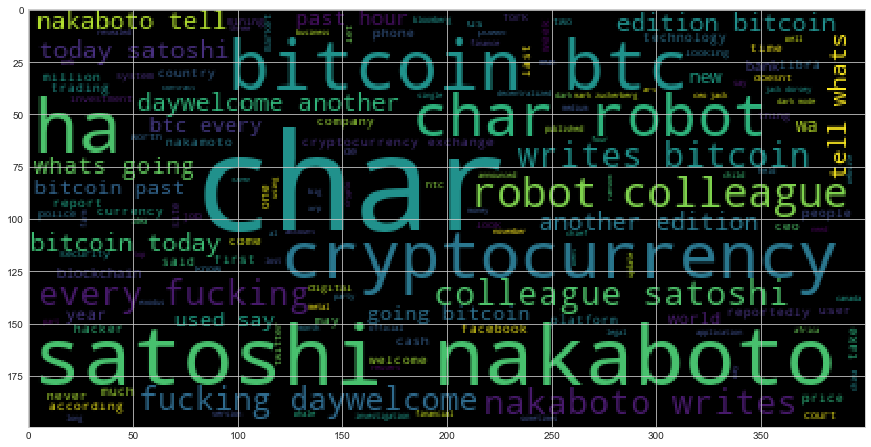

In [31]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(' '.join(all_btc_tokens))
plt.imshow(wc_btc)

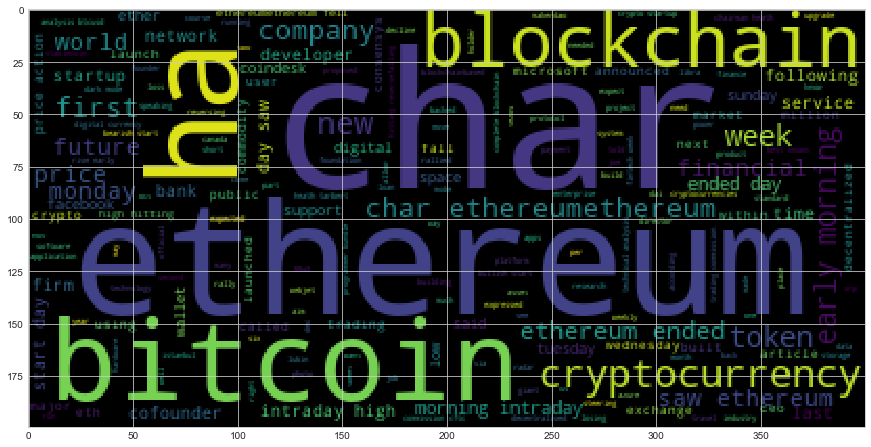

In [32]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(' '.join(all_eth_tokens))
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [34]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [36]:
#Concatenate and Clean to string
btc_big_string = ' '.join(bitcoin_sentiments['Text'])
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', btc_big_string)
input_words_btc = (re_clean)

In [37]:
doc_btc = displacy.render(nlp(str(input_words_btc)), jupyter=True, style='ent')


---

## Ethereum NER

In [38]:
#Concatenate and Clean to string
eth_big_string = ' '.join(etheruem_sentiments['Text'])
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', eth_big_string)
input_words_eth = (re_clean)
   

In [39]:
# Render the visualization
doc_eth = displacy.render(nlp(str(input_words_eth)), jupyter=True, style='ent')

In [60]:
# Run the NER processor on all of the text
# Add a title to the document
doc = nlp(input_words_btc)

#entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
#entities = [i.lower().replace(' ', '_') for i in entities]

#Print all of the found entities and their labels
for ent in doc.ents:
    print( ent, ent.label_,)


Less than two miles QUANTITY
Icelands Reykjavik FAC
tens of thousands CARDINAL
Bitcoin GPE
WiFi LOC
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Bitcoin GPE
Cryptocurrency PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Isaac Newton PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Nietzsche PERSON
Time ORG
Jack Dorsey PERSON
Bitcoin GPE
Ghana GPE
just weeks DATE
Bitcoin GPE
Africa LOC
Nigeria GPE
GhanaMini ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Hegel PERSON
Lets PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto ORG
Bitcoin PERSON
Isaac Newton PERSO

In [59]:
# Run the NER processor on all of the text
# Add a title to the document
doc = nlp(input_words_eth)

#entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
#entities = [i.lower().replace(' ', '_') for i in entities]

#Print all of the found entities and their labels
for ent in doc.ents:
    print( ent, ent.label_,)


Complete Blockchain ORG
Ethereum Programmer ORG
Bitcoin GPE
Cryptocurrency PERSON
Disrupt Berlin PERSON
December DATE
December DATE
Bitcoin GPE
WiFi LOC
Ethereum ETH ORG
second ORDINAL
isEthereums PERSON
Blockchain GPE
the year DATE
Bitcoin GPE
Blockchai GPE
ReutersulliBitcoin ORG
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerbergs PERSON
LibraliliZuckerberg ORG
Swiss NORP
Swissbased ORG
The Block reportsThe bank ORG
The Royal Bank of Canada ORG
platformLast week DATE
Canadian NORP
The Logic WORK_OF_ART
The Royal Bank of Canada ORG
Opera PERSON
Opera Mobile PERSON
the day DATE
six CARDINAL
Ripple XRP XRP PERSON
Bitcoin PERSON
XRP PERSON
third ORDINAL
Blockchain GPE
Bitcoin GPE
the Complete Blockchain and Ethereum Programmer Bundle ORG
Hyperbola ORG
first ORDINAL
public last week DATE
Chinese NORP
first ORDINAL
last year DATE
Chinese NORP
Tencent PRODUCT
standardsThe PERSON
Framework of DL PERSON
British Columbia Canada ORG
a gray morning TIME
May DATE
San Francisco GPE
Montgomery St

In [ ]:
input_words_btc

---